In [1]:
import os
import nltk
from nltk.corpus import stopwords
import string

In [2]:
# Set the path to the input directory
input_directory = "/Users/praharshita/Desktop/Capstone/merged_files_by_year"

# Set the path to the output directory
output_directory = "/Users/praharshita/Desktop/Capstone/cleaned_files_by_year"
#n=1
# Initialize NLTK's stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# List all files in the input directory
files = os.listdir(input_directory)

def process_file(file):
    print("Cleaning file Year:",str(file))
    #n+=1
    # Read data from the file with a more permissive encoding
    with open(os.path.join(input_directory, file), "r", encoding="utf-8-sig") as input_file:
        try:
            text = input_file.read()
        except UnicodeDecodeError:
            print(f"UnicodeDecodeError: Skipping file '{file}' due to encoding issue.")
            #continue

    text = text.replace(u'\u2014', ' ')
    
    # Tokenize the text into words
    words = nltk.word_tokenize(text)

    # Remove stop words and punctuation
    filtered_words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]

    # Reconstruct the text without stop words and punctuation
    filtered_text = " ".join(filtered_words)

    # Extract the file name without extension
    base_file_name = os.path.splitext(os.path.basename(file))[0]

    # Construct the output file path
    output_filename = os.path.join(output_directory, f"{base_file_name}.txt")

    # Overwrite the data into the same file
    with open(output_filename, "w", encoding="utf-8") as output_file:
        output_file.write(filtered_text)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/praharshita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import threading 


def worker(files):
    for file in files:
        process_file(file)
        
num_threads = 10  # Adjust this based on your system's capabilities

files_per_thread = len(files) // num_threads
file_chunks = [files[i:i + files_per_thread] for i in range(0, len(files), files_per_thread)]

# Create and start the threads
threads = []
for chunk in file_chunks:
    thread = threading.Thread(target=worker, args=(chunk,))
    threads.append(thread)
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()

print("All threads have finished processing.")

Cleaning file Year: 1912.txt
Cleaning file Year: 1870.txt
Cleaning file Year: 1901.txt
Cleaning file Year: 1838.txt
Cleaning file Year: 1962.txt
Cleaning file Year: 1825.txt
Cleaning file Year: 1981.txt
Cleaning file Year: 1808.txt
Cleaning file Year: 1918.txt
Cleaning file Year: 1882.txt
Cleaning file Year: 1843.txt
Cleaning file Year: 1834.txt
Cleaning file Year: 1819.txt
Cleaning file Year: 1855.txt
Cleaning file Year: 1964.txt
Cleaning file Year: 1917.txt
Cleaning file Year: 1906.txt
Cleaning file Year: 1945.txt
Cleaning file Year: 1894.txt
Cleaning file Year: 1820.txt
Cleaning file Year: 1924.txt
Cleaning file Year: 1903.txt
Cleaning file Year: 1858.txt
Cleaning file Year: 2002.txt
Cleaning file Year:Cleaning file Year: 1841.txt
 1968.txt
Cleaning file Year: 1888.txt
Cleaning file Year: 1951.txt
Cleaning file Year: 1930.txt
Cleaning file Year: 1880.txt
Cleaning file Year: 1989.txt
Cleaning file Year: 2000.txt
Cleaning file Year: 1970.txt
Cleaning file Year: 1869.txt
Cleaning file 

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/Users/praharshita/miniconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/Users/praharshita/miniconda3/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/var/folders/h9/24vbd1m931s_2j_jt_vy8cyr0000gn/T/ipykernel_99560/2472667931.py", line 6, in worker
  File "/var/folders/h9/24vbd1m931s_2j_jt_vy8cyr0000gn/T/ipykernel_99560/941528968.py", line 25, in process_file
UnboundLocalError: local variable 'text' referenced before assignment


Cleaning file Year: 1913.txt
Cleaning file Year: 1965.txt
Cleaning file Year: 1961.txt
Cleaning file Year: 1884.txt
Cleaning file Year: 1842.txt
Cleaning file Year: 1943.txt
Cleaning file Year: 1921.txt
Cleaning file Year: 1812.txt
Cleaning file Year: 1890.txt
Cleaning file Year: 1935.txt
Cleaning file Year: 1990.txt
Cleaning file Year: 1939.txt
Cleaning file Year: 1806.txt
Cleaning file Year: 1856.txt
Cleaning file Year: 1807.txt
Cleaning file Year: 1813.txt
Cleaning file Year: 1994.txt
Cleaning file Year: 1847.txt
Cleaning file Year: 1975.txt
Cleaning file Year: 1973.txt
Cleaning file Year: 1909.txt
Cleaning file Year: 1839.txt
Cleaning file Year: 1905.txt
Cleaning file Year: 1857.txt
Cleaning file Year: 1896.txt
Cleaning file Year: 1911.txt
Cleaning file Year: 1805.txt
Cleaning file Year: 1853.txt
Cleaning file Year: 1811.txt
Cleaning file Year: 2001.txt
Cleaning file Year: 1852.txt
Cleaning file Year: 1810.txt
Cleaning file Year: 1804.txt
Cleaning file Year: 1967.txt
Cleaning file 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/praharshita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Thread Thread-1: Processed file 3/51
Thread Thread-1: Processed file 5/51
Thread Thread-3: Processed file 1/20
Thread Thread-6: Processed file 1/20
Thread Thread-1: Processed file 1/20
Thread Thread-2: Processed file 3/51
Thread Thread-9: Processed file 1/20
Thread Thread-1: Processed file 4/51
Thread Thread-3: Processed file 2/20
Thread Thread-4: Processed file 6/51
Thread Thread-8: Processed file 1/20
Thread Thread-4: Processed file 7/51
Thread Thread-11: Processed file 1/4
Thread Thread-10: Processed file 1/20
Thread Thread-2: Processed file 1/20
Thread Thread-1: Processed file 2/20
Thread Thread-8: Processed file 2/20
Thread Thread-1: Processed file 6/51Thread Thread-2: Processed file 4/51

Thread Thread-1: Processed file 5/51
Thread Thread-4: Processed file 1/20
Thread Thread-6: Processed file 2/20
Thread Thread-10: Processed file 2/20
Thread Thread-11: Processed file 2/4
Thread Thread-2: Processed file 3/51
Thread Thread-3: Processed file 3/20
Thread Thread-2: Processed file 5/51

Thread Thread-5: Processed file 10/20
Thread Thread-3: Processed file 15/20
Thread Thread-1: Processed file 17/51
Thread Thread-4: Processed file 23/51
Thread Thread-1: Processed file 14/20
Thread Thread-4: Processed file 25/51
Thread Thread-10: Processed file 19/20
Thread Thread-3: Processed file 16/20
Thread Thread-2: Processed file 14/20
Thread Thread-9: Processed file 19/20
Thread Thread-3: Processed file 8/51
Thread Thread-8: Processed file 12/20
Thread Thread-3: Processed file 17/20
Thread Thread-1: Processed file 19/51
Thread Thread-3: Processed file 18/20
Thread Thread-1: Processed file 18/51
Thread Thread-4: Processed file 24/51
Thread Thread-9: Processed file 20/20
Thread Thread-2: Processed file 15/51
Thread Thread-3: Processed file 19/20
Thread Thread-4: Processed file 11/20
Thread Thread-1: Processed file 15/20
Thread Thread-10: Processed file 20/20
Thread Thread-8: Processed file 13/20
Thread Thread-2: Processed file 15/20
Thread Thread-4: Processed file 26/51
Thread Thre

Thread Thread-1: Processed file 41/51
Thread Thread-1: Processed file 40/51
Thread Thread-4: Processed file 51/51
Thread Thread-3: Processed file 22/51
Thread Thread-1: Processed file 42/51
Thread Thread-2: Processed file 28/51
Thread Thread-1: Processed file 41/51


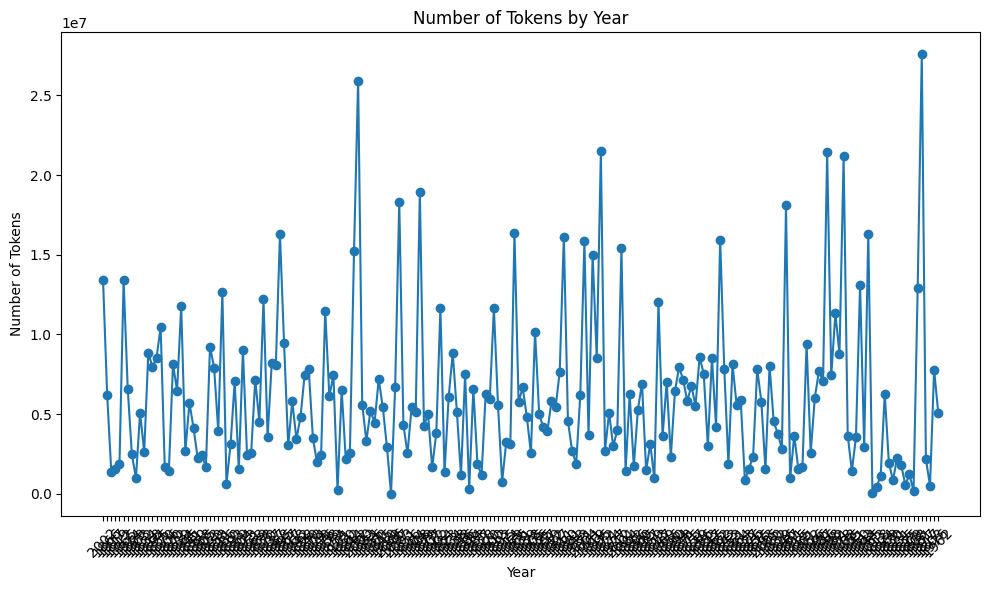

Thread Thread-3: Processed file 23/51
Thread Thread-1: Processed file 42/51
Thread Thread-2: Processed file 28/51
Thread Thread-4: Processed file 51/51
Thread Thread-1: Processed file 43/51
Thread Thread-3: Processed file 24/51
Thread Thread-1: Processed file 43/51


In [5]:
import os
import re
import nltk
import matplotlib.pyplot as plt
import threading
from collections import defaultdict

# Download NLTK data for tokenization (if not already downloaded)
nltk.download("punkt")

# Specify the directory containing the files
directory = "/Users/praharshita/Desktop/Capstone/merged_files_by_year"

# Create a dictionary to store token counts by year
token_counts = defaultdict(int)
token_counts_lock = threading.Lock()

# Define a function to count tokens in a file
def count_tokens(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        text = file.read()
        # Tokenize the text using NLTK
        tokens = nltk.word_tokenize(text)
        # Filter out punctuation and long dashes using regex
        filtered_tokens = [token for token in tokens if re.match(r"^[A-Za-z0-9]+$", token) and len(token) < 10]
        return len(filtered_tokens)

# Define a worker function for each thread
def worker(files):
    for i, file in enumerate(files):
        year = file.split(".")[0]
        file_path = os.path.join(directory, file)
        token_count = count_tokens(file_path)
        with token_counts_lock:
            token_counts[year] += token_count
        
        # Print progress
        print(f"Thread {threading.current_thread().name}: Processed file {i+1}/{len(files)}")

# Get a list of files in the directory
files = [filename for filename in os.listdir(directory) if filename.endswith(".txt")]

# Specify the number of threads to use
num_threads = 10  # Adjust this based on your system's capabilities

# Split the list of files into equal parts for each thread
files_per_thread = len(files) // num_threads
file_chunks = [files[i:i + files_per_thread] for i in range(0, len(files), files_per_thread)]

# Create and start the threads
threads = []
for i, chunk in enumerate(file_chunks):
    thread = threading.Thread(target=worker, args=(chunk,), name=f"Thread-{i+1}")
    threads.append(thread)
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()

# Extract years and corresponding token counts for plotting
years = list(token_counts.keys())
counts = list(token_counts.values())

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(years, counts, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Tokens")
plt.title("Number of Tokens by Year")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Thread Thread-3: Processed file 26/51
Thread Thread-1: Processed file 45/51
Thread Thread-1: Processed file 46/51


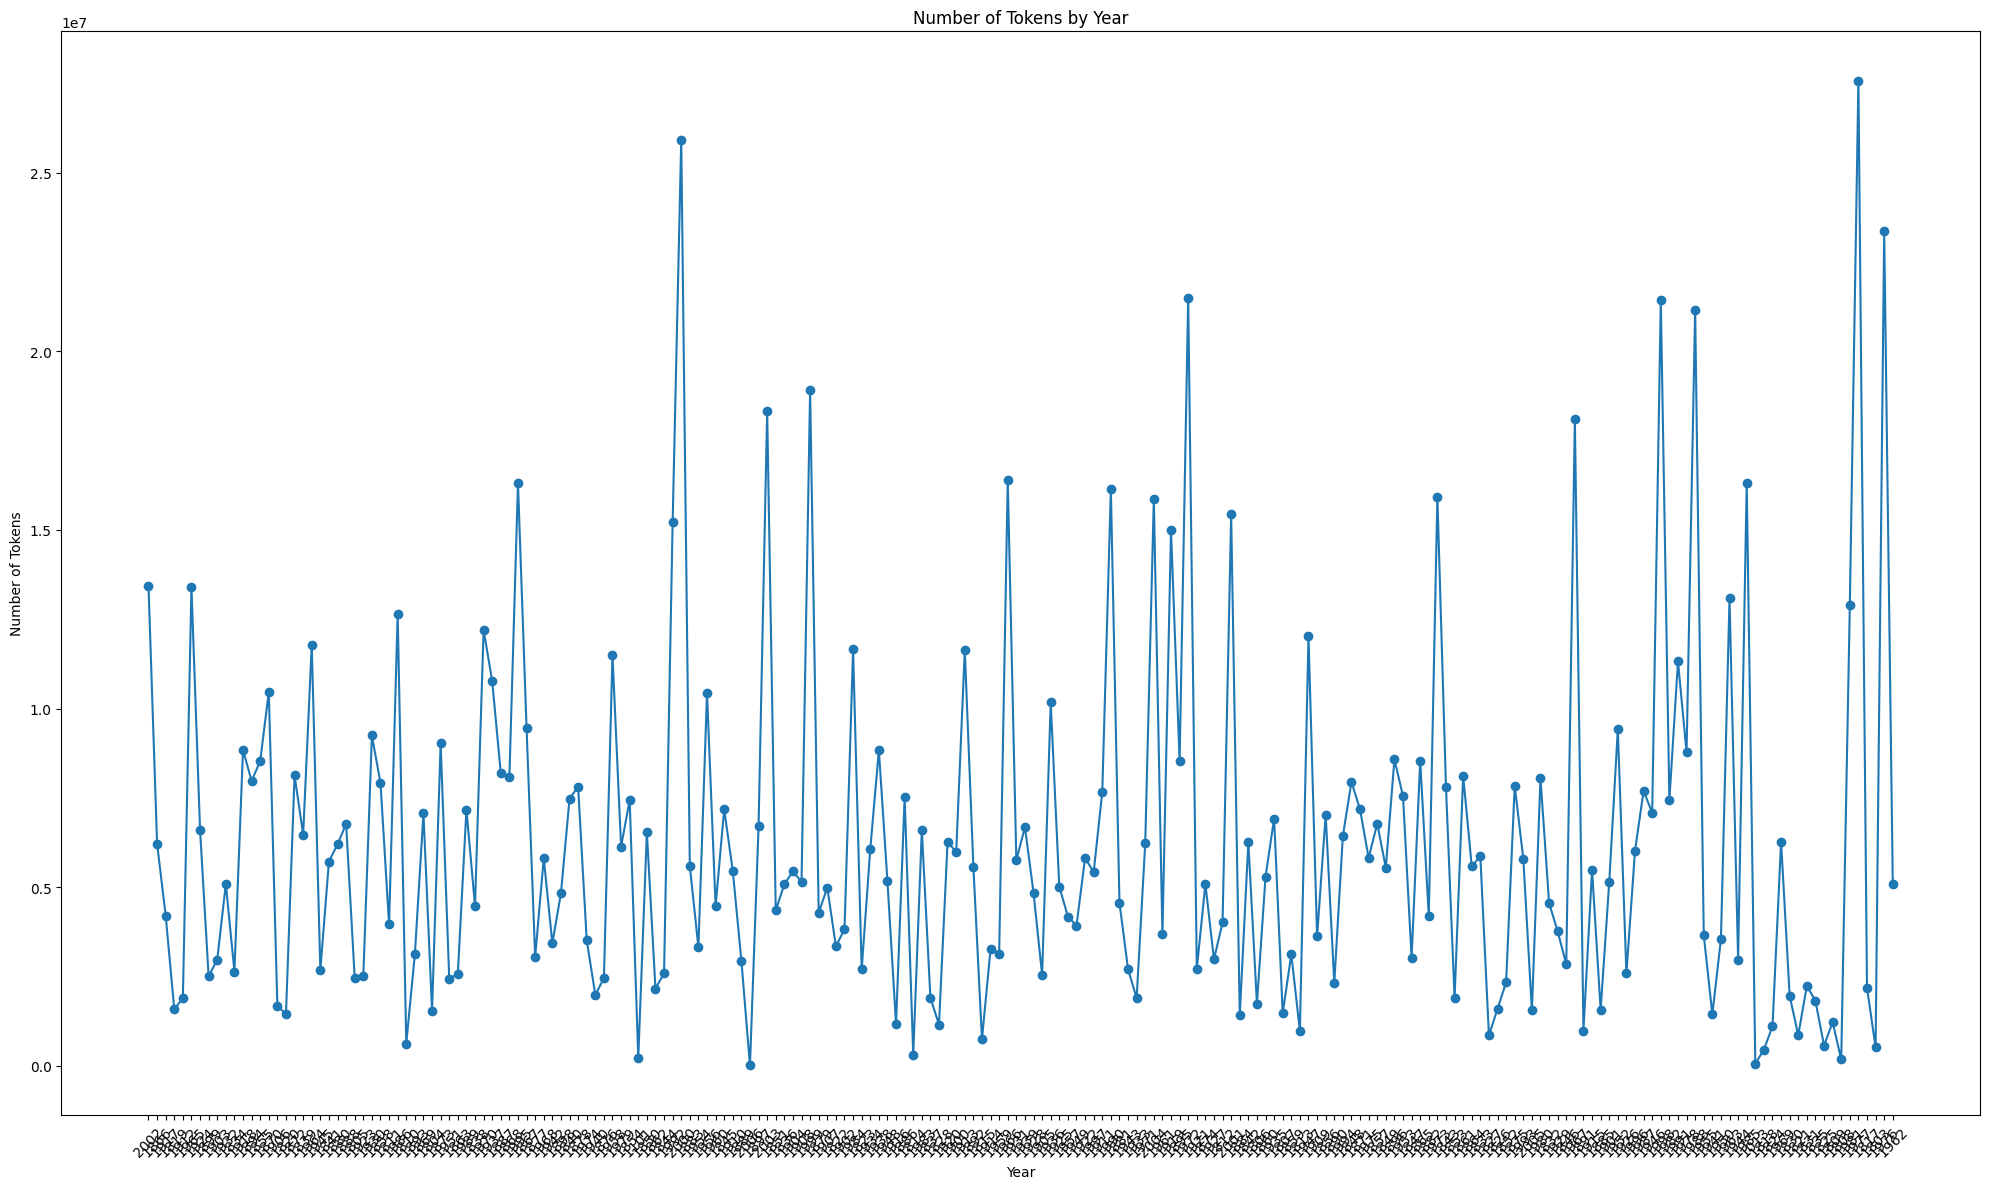

Thread Thread-3: Processed file 27/51
Thread Thread-1: Processed file 46/51
Thread Thread-1: Processed file 47/51
Thread Thread-1: Processed file 47/51
Thread Thread-2: Processed file 30/51
Thread Thread-1: Processed file 48/51
Thread Thread-1: Processed file 49/51
Thread Thread-2: Processed file 30/51
Thread Thread-1: Processed file 48/51
Thread Thread-1: Processed file 49/51
Thread Thread-2: Processed file 31/51
Thread Thread-3: Processed file 28/51
Thread Thread-2: Processed file 31/51
Thread Thread-1: Processed file 50/51
Thread Thread-1: Processed file 51/51
Thread Thread-1: Processed file 50/51
Thread Thread-1: Processed file 51/51
Thread Thread-2: Processed file 32/51
Thread Thread-2: Processed file 32/51


In [7]:
years = list(token_counts.keys())
counts = list(token_counts.values())

# Create a line plot
plt.figure(figsize=(20, 12))
plt.plot(years, counts, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Tokens")
plt.title("Number of Tokens by Year")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Thread Thread-3: Processed file 29/51


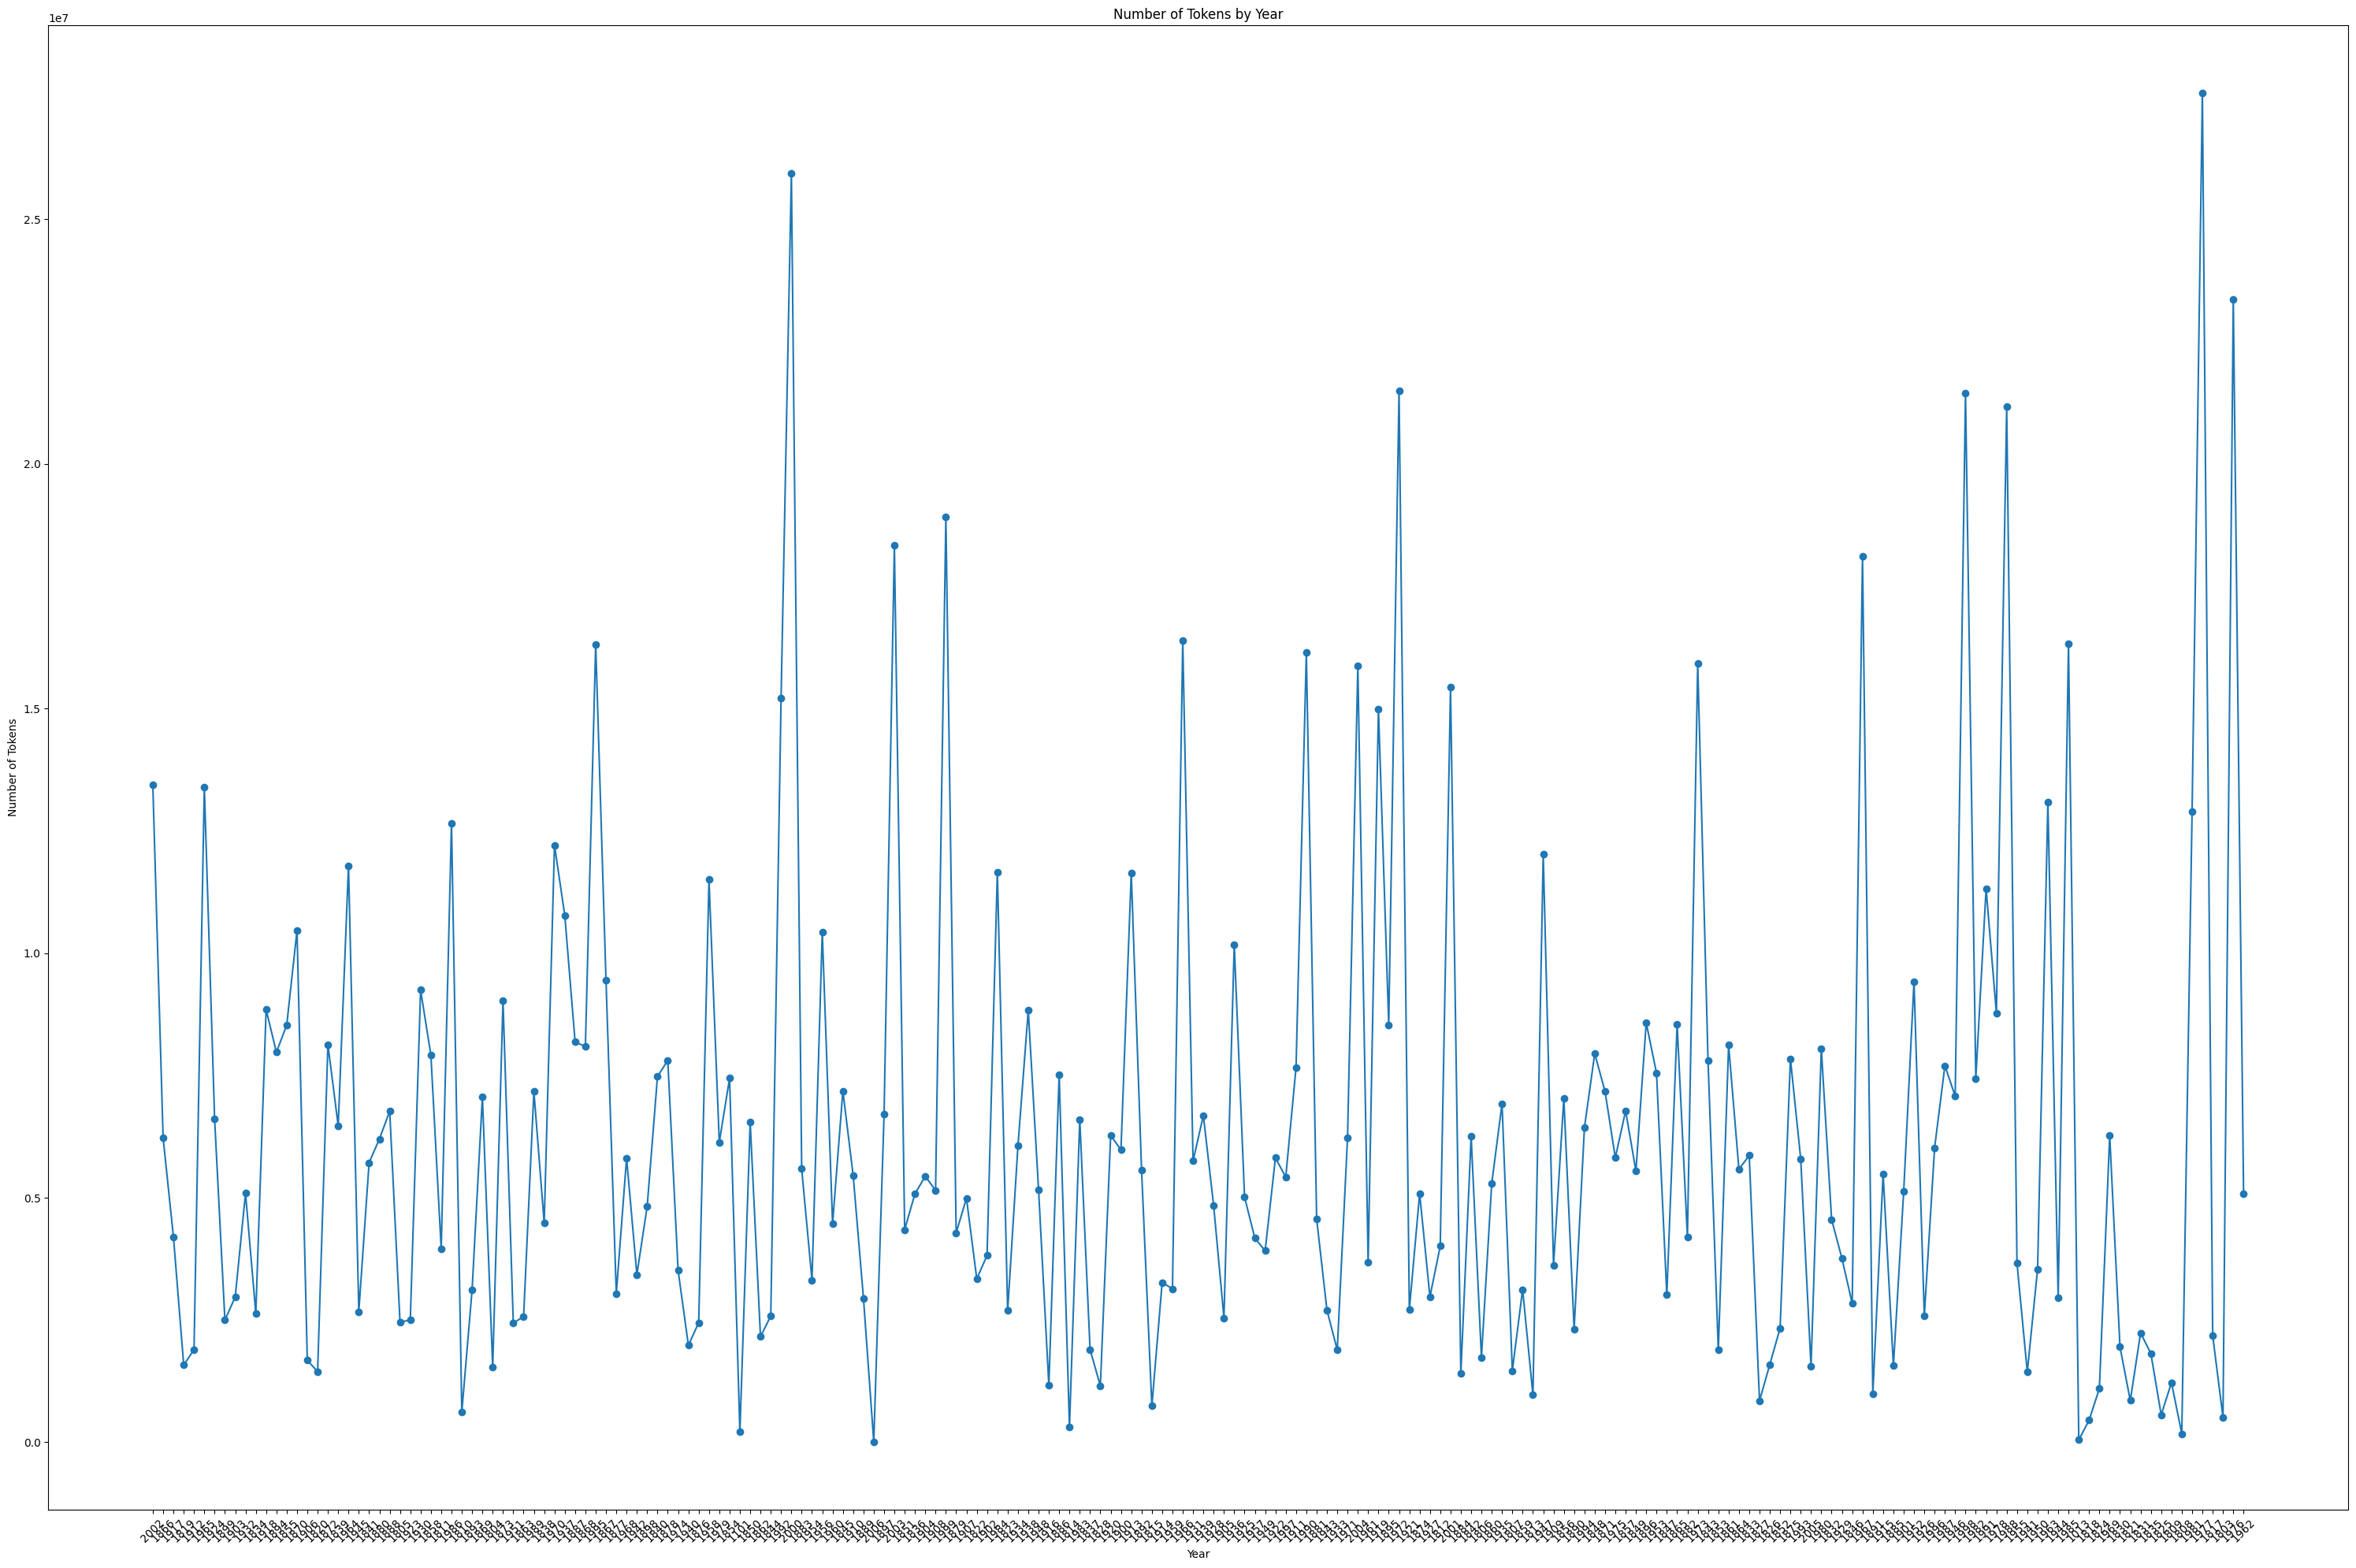

Thread Thread-2: Processed file 33/51
Thread Thread-2: Processed file 34/51
Thread Thread-2: Processed file 33/51
Thread Thread-2: Processed file 34/51
Thread Thread-2: Processed file 35/51
Thread Thread-2: Processed file 36/51
Thread Thread-2: Processed file 35/51
Thread Thread-2: Processed file 36/51
Thread Thread-3: Processed file 30/51
Thread Thread-2: Processed file 37/51
Thread Thread-2: Processed file 37/51


In [8]:
plt.figure(figsize=(30, 20))
plt.plot(years, counts, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Tokens")
plt.title("Number of Tokens by Year")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Thread Thread-3: Processed file 31/51


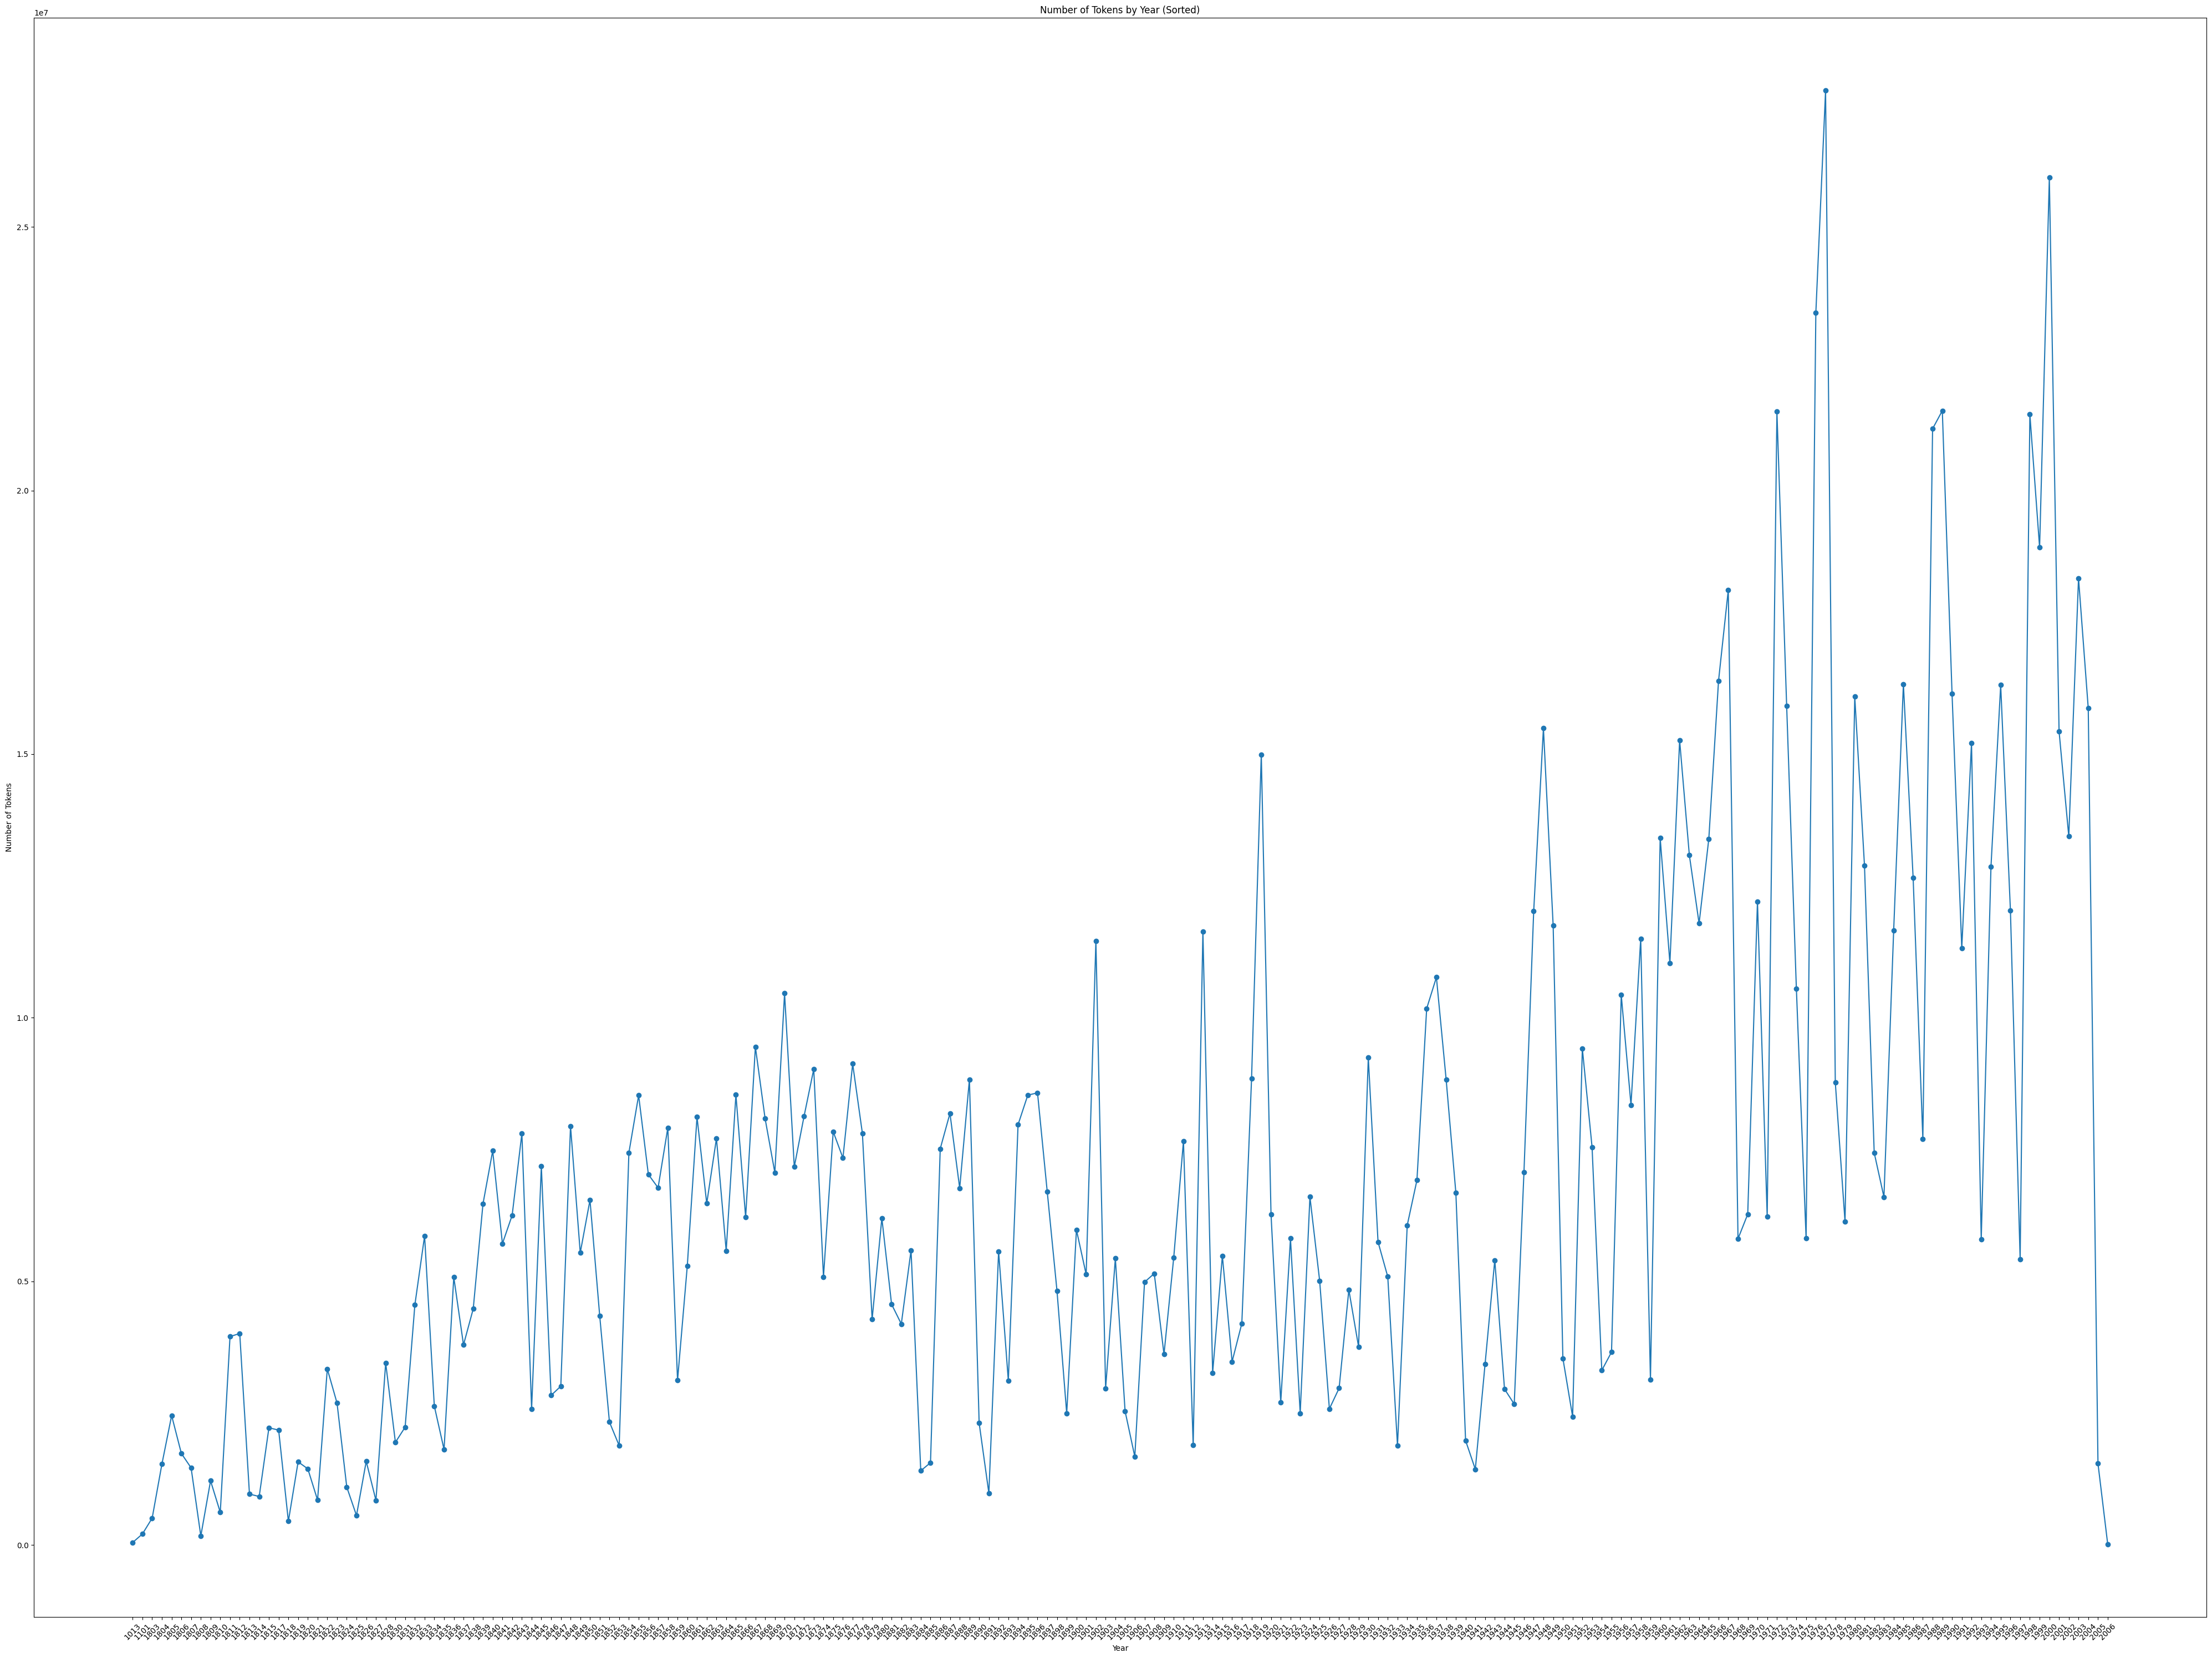

Thread Thread-2: Processed file 39/51
Thread Thread-2: Processed file 39/51
Thread Thread-3: Processed file 32/51
Thread Thread-3: Processed file 33/51


In [10]:
# Sort years in ascending order
sorted_years = sorted(list(token_counts.keys()))

# Extract counts in sorted order
sorted_counts = [token_counts[year] for year in sorted_years]

# Create a line plot
plt.figure(figsize=(40, 30))
plt.plot(sorted_years, sorted_counts, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Tokens")
plt.title("Number of Tokens by Year (Sorted)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

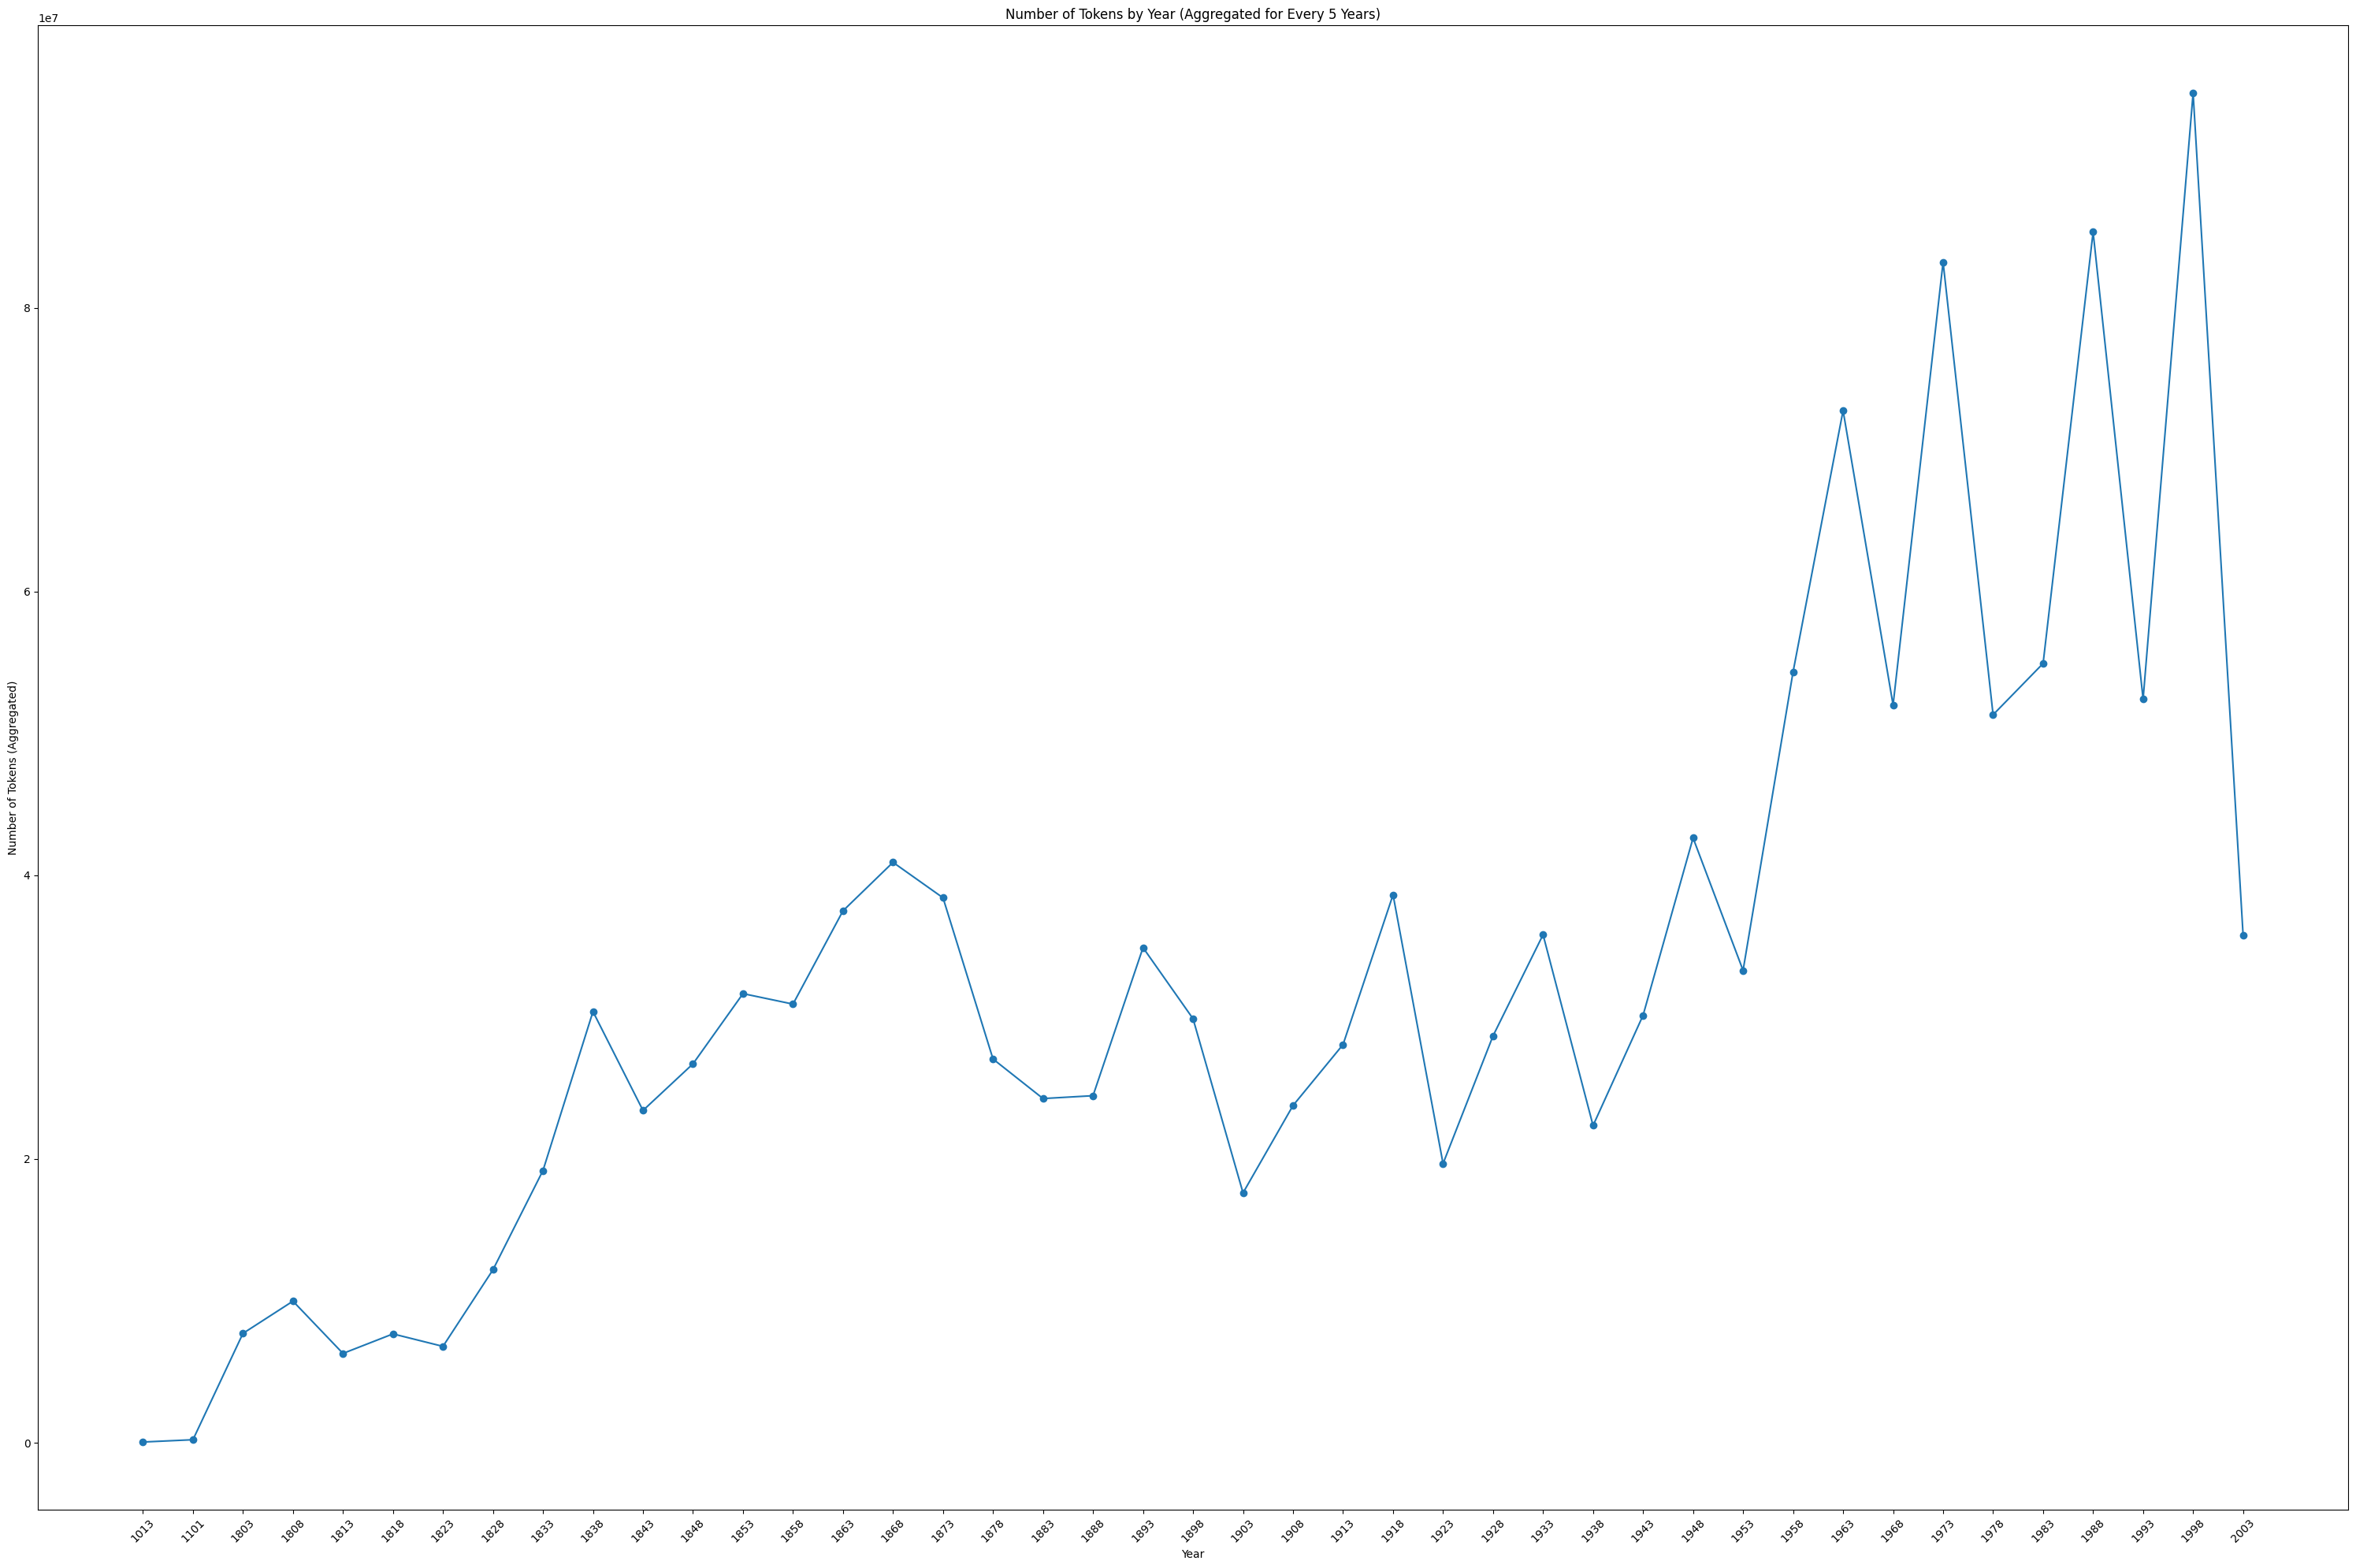

Thread Thread-2: Processed file 40/51
Thread Thread-2: Processed file 40/51
Thread Thread-3: Processed file 34/51
Thread Thread-3: Processed file 35/51
Thread Thread-3: Processed file 36/51
Thread Thread-3: Processed file 37/51
Thread Thread-3: Processed file 38/51
Thread Thread-2: Processed file 41/51
Thread Thread-2: Processed file 41/51
Thread Thread-3: Processed file 39/51
Thread Thread-3: Processed file 40/51
Thread Thread-3: Processed file 41/51
Thread Thread-2: Processed file 42/51
Thread Thread-2: Processed file 42/51
Thread Thread-3: Processed file 42/51
Thread Thread-2: Processed file 43/51
Thread Thread-2: Processed file 43/51
Thread Thread-3: Processed file 43/51
Thread Thread-2: Processed file 44/51
Thread Thread-2: Processed file 45/51
Thread Thread-2: Processed file 44/51
Thread Thread-2: Processed file 45/51
Thread Thread-2: Processed file 46/51
Thread Thread-2: Processed file 46/51
Thread Thread-2: Processed file 47/51
Thread Thread-2: Processed file 47/51
Thread Threa

In [11]:
# Aggregate counts for every 5 years
aggregated_years = []
aggregated_counts = []
current_year = ""
current_count = 0

for year, count in zip(sorted_years, sorted_counts):
    if current_year == "":
        current_year = year
        current_count = count
    elif int(year) - int(current_year) <= 4:
        current_count += count
    else:
        aggregated_years.append(current_year)
        aggregated_counts.append(current_count)
        current_year = year
        current_count = count

aggregated_years.append(current_year)
aggregated_counts.append(current_count)

# Create a line plot
plt.figure(figsize=(30, 20))
plt.plot(aggregated_years, aggregated_counts, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Tokens (Aggregated)")
plt.title("Number of Tokens by Year (Aggregated for Every 5 Years)")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

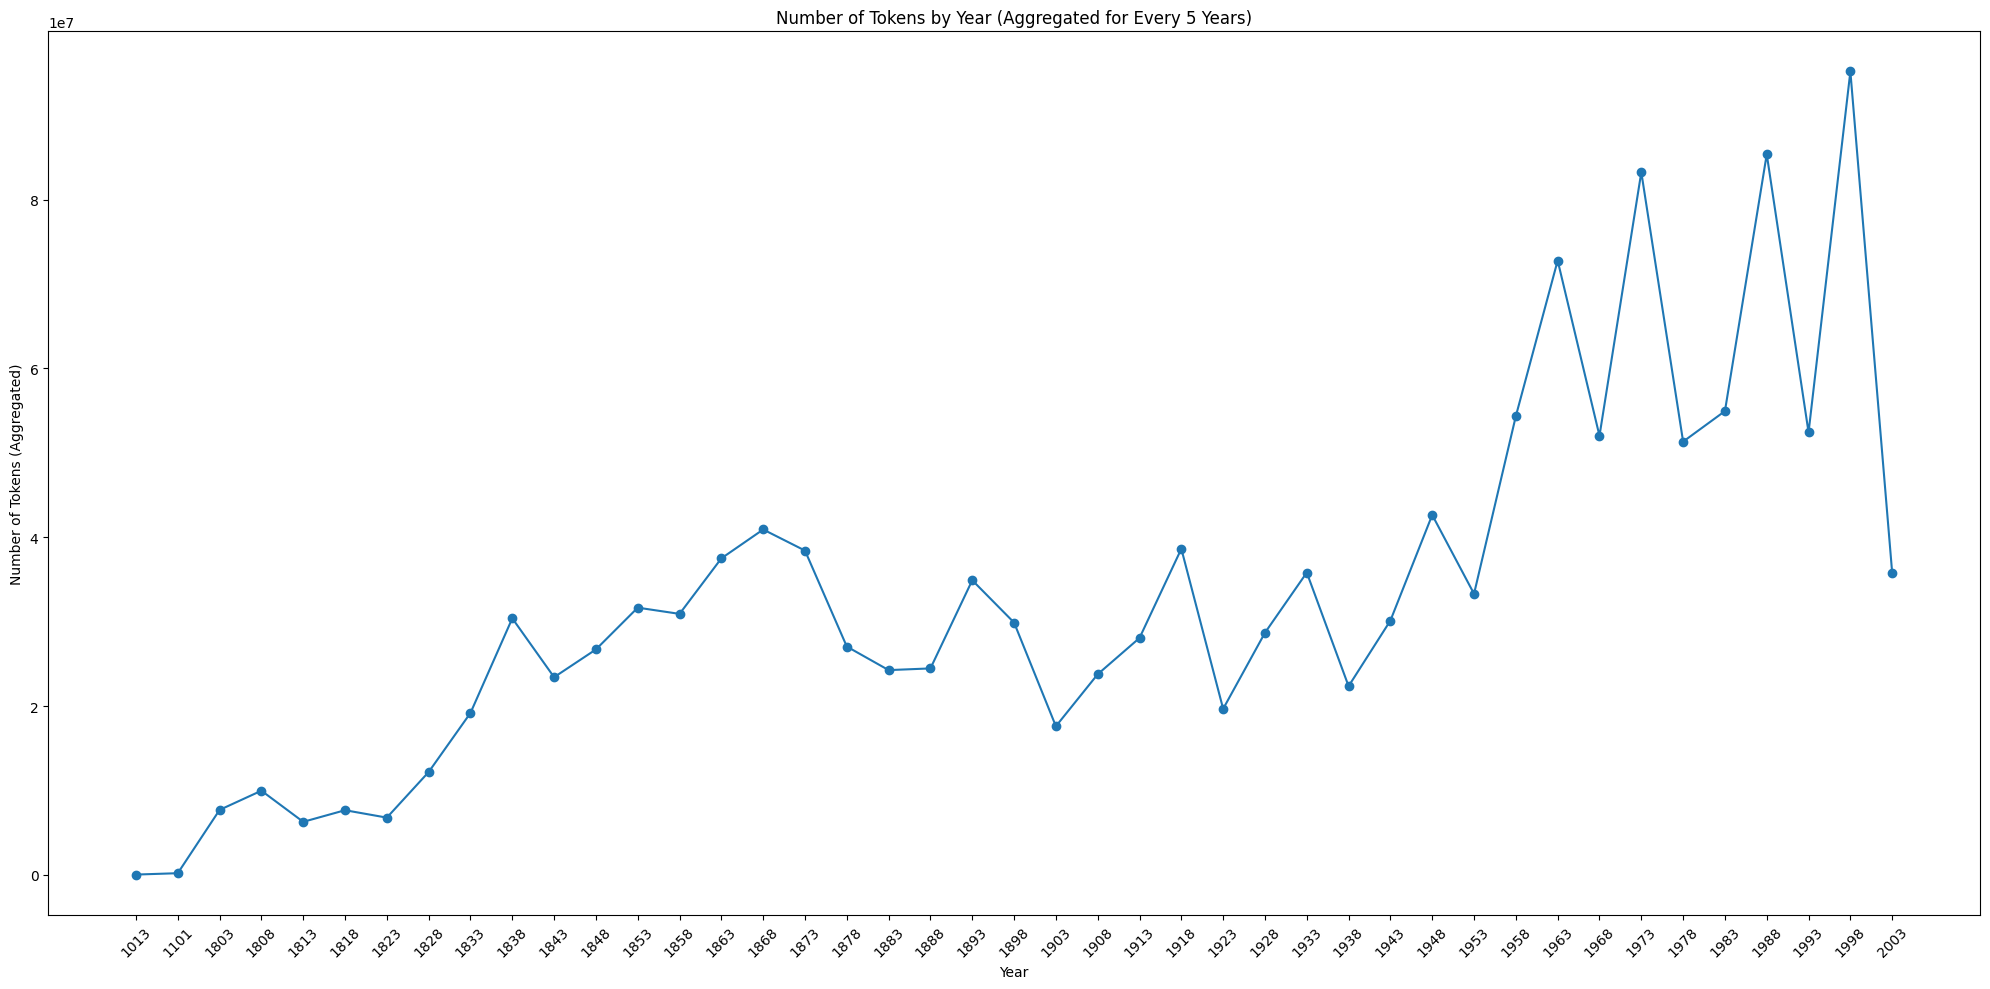

In [12]:
# Create a line plot
plt.figure(figsize=(20, 10))
plt.plot(aggregated_years, aggregated_counts, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Tokens (Aggregated)")
plt.title("Number of Tokens by Year (Aggregated for Every 5 Years)")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

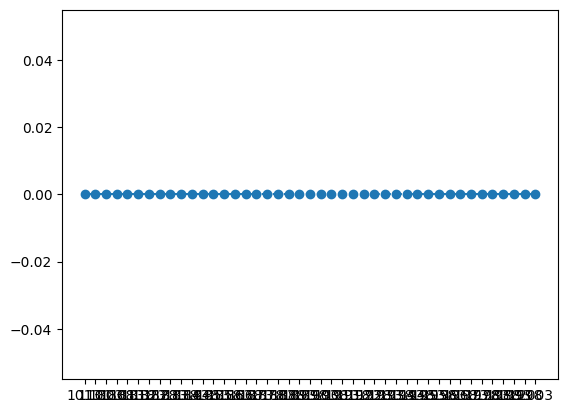

In [15]:
word_counts = {
    "she": defaultdict(int),
    "hers": defaultdict(int),
    "her": defaultdict(int)
}
she_counts = [word_counts["she"][year] for year in aggregated_years]
hers_counts = [word_counts["hers"][year] for year in aggregated_years]
her_counts = [word_counts["her"][year] for year in aggregated_years]

plt.plot(aggregated_years, she_counts, label="she", marker='o', linestyle='--')
